In [34]:
import os
import requests
import pandas as pd
import numpy as np 
import seaborn as sns 
import hvplot.pandas
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [35]:
import yfinance as yf

In [36]:
def read_data(data, start, end):
    data_df = yf.download(data, start, end)
    data_df.dropna(inplace = True)
    dataclose_df = data_df["Adj Close"]
    return dataclose_df

In [37]:
defport = read_data(['DHOF.AX', 'GROW.AX', 'QPON.AX', 'ILB.AX', 'MVA.AX', 'GOLD.AX', 'AAA.AX'],"2019-04-01","2022-04-15")
shareport = read_data(['360.AX', 'ANZ.AX', 'CBA.AX', 'ALD.AX', 'AMC.AX', 'BHP.AX', 'APA.AX', 'BXB.AX', 'CHC.AX', 'WES.AX', 'CSL.AX', 'TLS.AX',],"2019-04-01","2022-04-15")
growport = read_data(['EX20.AX', 'QUAL.AX','ACDC.AX', 'MHG.AX', 'FEMX.AX', 'MICH.AX', 'DJRE.AX'],"2019-04-01","2022-04-15")
indexport = read_data(['^AXJO','JABAX'],"2019-04-01", "2022-04-15")
# 'MCSG.XA','MCSI.XA', include these 'XRO' 

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  2 of 2 completed


In [38]:
close_df = pd.concat([defport, shareport, growport, indexport], axis = "columns", join = "inner")
close_df.dropna(inplace = True)
close_df.tail()

,AAA.AX,DHOF.AX,GOLD.AX,GROW.AX,ILB.AX,MVA.AX,QPON.AX,360.AX,ALD.AX,AMC.AX,...,WES.AX,ACDC.AX,DJRE.AX,EX20.AX,FEMX.AX,MHG.AX,MICH.AX,QUAL.AX,JABAX,^AXJO
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-08,50.070000,9.59,240.649994,3.64,123.760002,24.400000,25.68,5.15,31.93,15.46,...,49.020000,84.379997,23.549999,20.629999,5.95,3.56,3.14,38.799999,42.220001,7478.000000
2022-04-11,50.080002,9.59,243.050003,3.66,123.220001,24.379999,25.67,5.04,31.65,15.65,...,48.450001,83.070000,23.549999,20.610001,5.88,3.57,3.17,38.450001,41.669998,7485.200195
2022-04-12,50.080002,9.59,245.169998,3.65,122.800003,24.150000,25.67,5.00,31.68,15.69,...,47.959999,82.389999,23.459999,20.459999,5.88,3.51,3.15,37.880001,41.570000,7454.000000
2022-04-13,50.080002,9.59,246.059998,3.66,123.180000,24.150000,25.67,5.12,32.00,15.71,...,48.380001,83.540001,23.510000,20.549999,5.95,3.50,3.16,38.009998,41.900002,7479.000000
2022-04-14,50.080002,9.55,246.369995,3.64,123.620003,24.120001,25.65,5.42,31.92,15.79,...,48.330002,84.540001,23.590000,20.760000,5.92,3.53,3.15,38.290001,41.490002,7523.399902


In [39]:
closeindex_df = (indexport)
closeindex_df.dropna(inplace = True)
closeindex_df.head()

,JABAX,^AXJO
Date,,
2019-04-01,30.622850,6217.000000
2019-04-02,30.631960,6242.399902
2019-04-03,30.641058,6285.000000
2019-04-04,30.713890,6232.799805
2019-04-05,30.777607,6181.299805


In [40]:
datareturns_df = close_df.pct_change().copy()
datareturns_df.head(10)

,AAA.AX,DHOF.AX,GOLD.AX,GROW.AX,ILB.AX,MVA.AX,QPON.AX,360.AX,ALD.AX,AMC.AX,...,WES.AX,ACDC.AX,DJRE.AX,EX20.AX,FEMX.AX,MHG.AX,MICH.AX,QUAL.AX,JABAX,^AXJO
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-11,0.0,0.000421,0.009048,-0.007895,0.000687,-0.016810,0.000387,-0.015834,-0.005665,0.007130,...,-0.013480,-0.000932,-0.001619,-0.006199,-0.004243,-0.007792,-0.006601,-0.006282,0.006028,-0.007654
2022-01-12,0.0,0.000241,0.001623,0.000000,0.007481,-0.003579,0.000387,0.059406,0.016421,-0.005310,...,0.006034,0.015026,-0.001621,0.005278,0.011364,0.005236,-0.003322,0.005385,0.001110,0.006603
2022-01-13,0.0,-0.001382,-0.005286,0.010610,-0.001212,-0.003591,0.000386,0.010514,0.017145,-0.001779,...,-0.027518,-0.000817,-0.007714,-0.000477,0.002809,0.000000,0.000000,-0.008384,-0.009754,0.004772
2022-01-14,0.0,0.000632,0.000943,-0.002625,-0.001821,-0.005206,-0.000386,-0.042775,-0.007131,0.005348,...,-0.020497,-0.003781,0.003682,-0.006208,-0.009804,-0.010417,0.006667,-0.013152,-0.002686,-0.010770
2022-01-18,0.0,-0.001033,0.006936,-0.007895,-0.007676,-0.000805,-0.000773,0.047101,0.020895,0.010047,...,0.021852,0.007179,0.002038,0.001922,0.009901,-0.002632,-0.009934,0.007615,-0.013917,0.002015
2022-01-19,0.0,-0.001405,-0.002041,0.005305,0.000996,-0.000403,0.000774,-0.017301,-0.004157,0.000585,...,-0.010330,-0.017312,-0.009764,-0.008153,-0.012605,-0.013193,-0.003344,-0.022201,-0.004097,-0.010299
2022-01-20,0.0,0.000663,0.008948,0.000000,0.003061,-0.012898,-0.001160,0.001174,-0.012524,0.002924,...,-0.005677,-0.002487,-0.012736,-0.001451,0.004255,0.005348,-0.006711,0.000000,-0.006400,0.001350
2022-01-21,0.0,-0.001296,0.006419,-0.005277,0.003051,-0.017558,0.000387,-0.049238,-0.023415,-0.021574,...,-0.022652,-0.011012,-0.006658,-0.023245,0.000000,-0.013298,0.006757,-0.018116,-0.009432,-0.022690


In [41]:
dailyreturn_std = datareturns_df.std() 
dailyreturn_std

AAA.AX     0.000143
DHOF.AX    0.002847
GOLD.AX    0.012070
GROW.AX    0.005467
ILB.AX     0.005846
MVA.AX     0.011908
QPON.AX    0.000967
360.AX     0.065620
ALD.AX     0.016929
AMC.AX     0.013251
ANZ.AX     0.013263
APA.AX     0.012159
BHP.AX     0.019586
BXB.AX     0.014188
CBA.AX     0.013394
CHC.AX     0.020273
CSL.AX     0.019138
TLS.AX     0.012236
WES.AX     0.016504
ACDC.AX    0.017012
DJRE.AX    0.009854
EX20.AX    0.010060
FEMX.AX    0.014809
MHG.AX     0.012803
MICH.AX    0.008373
QUAL.AX    0.014050
JABAX      0.009558
^AXJO      0.009368
dtype: float64

In [42]:
#get daily returns on defensive portfolio 
defreturns_df = defport.pct_change().copy() 
defreturns_df.head()

,AAA.AX,DHOF.AX,GOLD.AX,GROW.AX,ILB.AX,MVA.AX,QPON.AX
Date,,,,,,,
2022-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-11,0.0,0.000421,0.009048,-0.007895,0.000687,-0.016810,0.000387
2022-01-12,0.0,0.000241,0.001623,0.000000,0.007481,-0.003579,0.000387
2022-01-13,0.0,-0.001382,-0.005286,0.010610,-0.001212,-0.003591,0.000386
2022-01-14,0.0,0.000632,0.000943,-0.002625,-0.001821,-0.005206,-0.000386


In [43]:
defport_std = defreturns_df.std() 
defport_std

AAA.AX     0.000141
DHOF.AX    0.002805
GOLD.AX    0.011889
GROW.AX    0.005404
ILB.AX     0.005745
MVA.AX     0.011765
QPON.AX    0.000964
dtype: float64

In [44]:
# Calculate the annualized standard deviation (252 trading days)
annualdef_std = defport_std * np.sqrt(252)
annualdef_std

AAA.AX     0.002242
DHOF.AX    0.044522
GOLD.AX    0.188732
GROW.AX    0.085794
ILB.AX     0.091202
MVA.AX     0.186767
QPON.AX    0.015308
dtype: float64

In [45]:
#look at correlations for defensive holdings first 
defportcorr = defreturns_df.corr()
defportcorr

,AAA.AX,DHOF.AX,GOLD.AX,GROW.AX,ILB.AX,MVA.AX,QPON.AX
AAA.AX,1.000000,0.041568,0.065024,-0.059700,-0.035061,-0.233348,-0.075378
DHOF.AX,0.041568,1.000000,-0.235491,-0.127901,0.079695,-0.097264,0.234616
GOLD.AX,0.065024,-0.235491,1.000000,-0.209124,0.186721,-0.396744,-0.154474
GROW.AX,-0.059700,-0.127901,-0.209124,1.000000,0.129265,0.234018,0.212824
ILB.AX,-0.035061,0.079695,0.186721,0.129265,1.000000,-0.010703,0.038310
MVA.AX,-0.233348,-0.097264,-0.396744,0.234018,-0.010703,1.000000,0.012200
QPON.AX,-0.075378,0.234616,-0.154474,0.212824,0.038310,0.012200,1.000000


<AxesSubplot:>

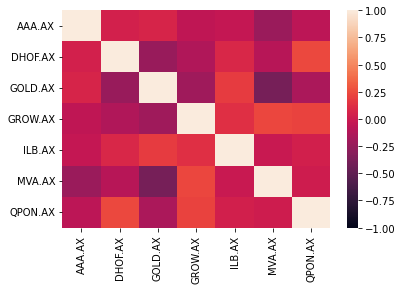

In [46]:
sns.heatmap(defportcorr, vmin=-1, vmax=1)

In [47]:
# Calculate sharpe ratios of defensive portfolio
sharpe_ratios = (datareturns_df.mean() * 252) / (dailyreturn_std * np.sqrt(252))
sharpe_ratios

AAA.AX     0.341316
DHOF.AX   -3.712993
GOLD.AX    1.302244
GROW.AX   -1.878448
ILB.AX    -2.346847
MVA.AX    -1.111376
QPON.AX   -1.953925
360.AX    -1.001358
ALD.AX     1.217706
AMC.AX    -0.882830
ANZ.AX    -0.522771
APA.AX     1.950403
BHP.AX     2.691155
BXB.AX    -0.444589
CBA.AX     0.980345
CHC.AX    -2.344992
CSL.AX    -0.487303
TLS.AX    -0.389921
WES.AX    -2.101684
ACDC.AX   -1.776640
DJRE.AX   -1.072177
EX20.AX   -0.165200
FEMX.AX   -2.808018
MHG.AX    -1.553978
MICH.AX    1.198721
QUAL.AX   -1.896562
JABAX     -1.879596
^AXJO      0.339371
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

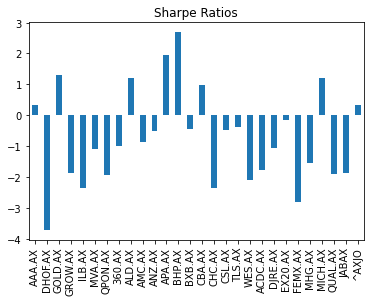

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [49]:
sharereturns_df = shareport.pct_change().copy() 
sharereturns_df.head()

,360.AX,ALD.AX,AMC.AX,ANZ.AX,APA.AX,BHP.AX,BXB.AX,CBA.AX,CHC.AX,CSL.AX,TLS.AX,WES.AX
Date,,,,,,,,,,,,
2019-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-13,-0.039548,-0.004219,0.016812,-0.010112,-0.001959,0.003533,0.011410,-0.025199,0.010827,0.014195,0.011730,0.000820
2019-05-14,-0.019608,-0.008860,0.004287,-0.012486,-0.003925,-0.011102,-0.012087,-0.012653,0.007790,-0.011297,0.000000,-0.008738
2019-05-15,-0.008000,0.004275,0.000000,0.007280,0.002956,0.018620,0.008157,-0.000413,-0.006763,0.015420,0.002898,0.000551
2019-05-16,-0.036290,0.023607,0.006098,0.014074,0.016699,0.009140,0.012136,0.010890,0.007782,0.010655,0.014451,-0.006883


In [50]:
shareport_std = sharereturns_df.std() 
shareport_std

360.AX    0.037347
ALD.AX    0.020749
AMC.AX    0.014281
ANZ.AX    0.019619
APA.AX    0.015254
BHP.AX    0.019564
BXB.AX    0.015664
CBA.AX    0.017691
CHC.AX    0.024884
CSL.AX    0.018805
TLS.AX    0.013973
WES.AX    0.015686
dtype: float64

In [51]:
# Calculate the annualized standard deviation (252 trading days)
annualshare_std = shareport_std * np.sqrt(252)
annualshare_std

360.AX    0.592870
ALD.AX    0.329385
AMC.AX    0.226696
ANZ.AX    0.311435
APA.AX    0.242156
BHP.AX    0.310576
BXB.AX    0.248650
CBA.AX    0.280832
CHC.AX    0.395018
CSL.AX    0.298518
TLS.AX    0.221811
WES.AX    0.249003
dtype: float64

In [52]:
shareportcorr = sharereturns_df.corr() 
shareportcorr

,360.AX,ALD.AX,AMC.AX,ANZ.AX,APA.AX,BHP.AX,BXB.AX,CBA.AX,CHC.AX,CSL.AX,TLS.AX,WES.AX
360.AX,1.000000,0.189583,0.145176,0.219752,0.097481,0.135941,0.092728,0.197370,0.297985,0.178035,0.159948,0.239682
ALD.AX,0.189583,1.000000,0.311099,0.430137,0.204438,0.429606,0.333139,0.399900,0.330435,0.328063,0.276853,0.337223
AMC.AX,0.145176,0.311099,1.000000,0.364133,0.407038,0.336913,0.458377,0.374040,0.276830,0.308231,0.301512,0.331877
ANZ.AX,0.219752,0.430137,0.364133,1.000000,0.357082,0.488187,0.384770,0.843534,0.414470,0.333083,0.351714,0.508568
APA.AX,0.097481,0.204438,0.407038,0.357082,1.000000,0.251696,0.404700,0.423591,0.326477,0.431242,0.344828,0.453561
BHP.AX,0.135941,0.429606,0.336913,0.488187,0.251696,1.000000,0.364173,0.487672,0.182963,0.294595,0.338278,0.352514
BXB.AX,0.092728,0.333139,0.458377,0.384770,0.404700,0.364173,1.000000,0.428152,0.295573,0.472861,0.431197,0.505572
CBA.AX,0.197370,0.399900,0.374040,0.843534,0.423591,0.487672,0.428152,1.000000,0.374549,0.436638,0.425249,0.603700
CHC.AX,0.297985,0.330435,0.276830,0.414470,0.326477,0.182963,0.295573,0.374549,1.000000,0.256620,0.210729,0.407692
CSL.AX,0.178035,0.328063,0.308231,0.333083,0.431242,0.294595,0.472861,0.436638,0.256620,1.000000,0.479270,0.596916


<AxesSubplot:>

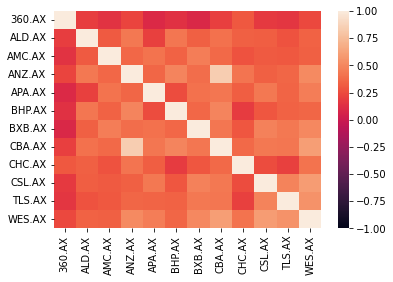

In [53]:
sns.heatmap(shareportcorr, vmin=-1, vmax=1)

In [54]:
growreturns_df = growport.pct_change().copy() 
growreturns_df.head() 

,ACDC.AX,DJRE.AX,EX20.AX,FEMX.AX,MHG.AX,MICH.AX,QUAL.AX
Date,,,,,,,
2019-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-02,0.011606,0.002195,0.007919,0.008421,0.003096,-0.006623,0.006915
2019-04-03,0.004798,0.003504,0.002806,0.002088,0.006173,0.006667,0.005723
2019-04-04,0.000830,-0.004801,-0.006156,-0.002083,-0.003067,0.000000,-0.001517
2019-04-05,0.003941,-0.002632,-0.009009,0.002088,0.000000,-0.013245,-0.001520


In [55]:
growport_std = growreturns_df.std() 
growport_std

ACDC.AX    0.012980
DJRE.AX    0.011530
EX20.AX    0.011467
FEMX.AX    0.011455
MHG.AX     0.010266
MICH.AX    0.009754
QUAL.AX    0.010491
dtype: float64

In [56]:
# Calculate the annualized standard deviation (252 trading days)
annualgrow_std = growport_std * np.sqrt(252)
annualgrow_std

ACDC.AX    0.206046
DJRE.AX    0.183026
EX20.AX    0.182035
FEMX.AX    0.181841
MHG.AX     0.162968
MICH.AX    0.154842
QUAL.AX    0.166536
dtype: float64

In [57]:
growcorrelation = growreturns_df.corr() 
growcorrelation

,ACDC.AX,DJRE.AX,EX20.AX,FEMX.AX,MHG.AX,MICH.AX,QUAL.AX
ACDC.AX,1.000000,0.445174,0.607159,0.537518,0.501447,0.375889,0.583372
DJRE.AX,0.445174,1.000000,0.510718,0.361537,0.471183,0.628770,0.443107
EX20.AX,0.607159,0.510718,1.000000,0.457646,0.597848,0.524502,0.644967
FEMX.AX,0.537518,0.361537,0.457646,1.000000,0.501546,0.333601,0.483367
MHG.AX,0.501447,0.471183,0.597848,0.501546,1.000000,0.610004,0.654870
MICH.AX,0.375889,0.628770,0.524502,0.333601,0.610004,1.000000,0.447739
QUAL.AX,0.583372,0.443107,0.644967,0.483367,0.654870,0.447739,1.000000


<AxesSubplot:>

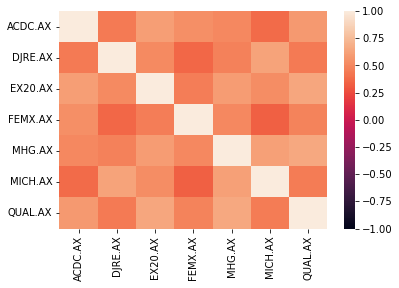

In [58]:
sns.heatmap(growcorrelation, vmin=-1, vmax=1)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

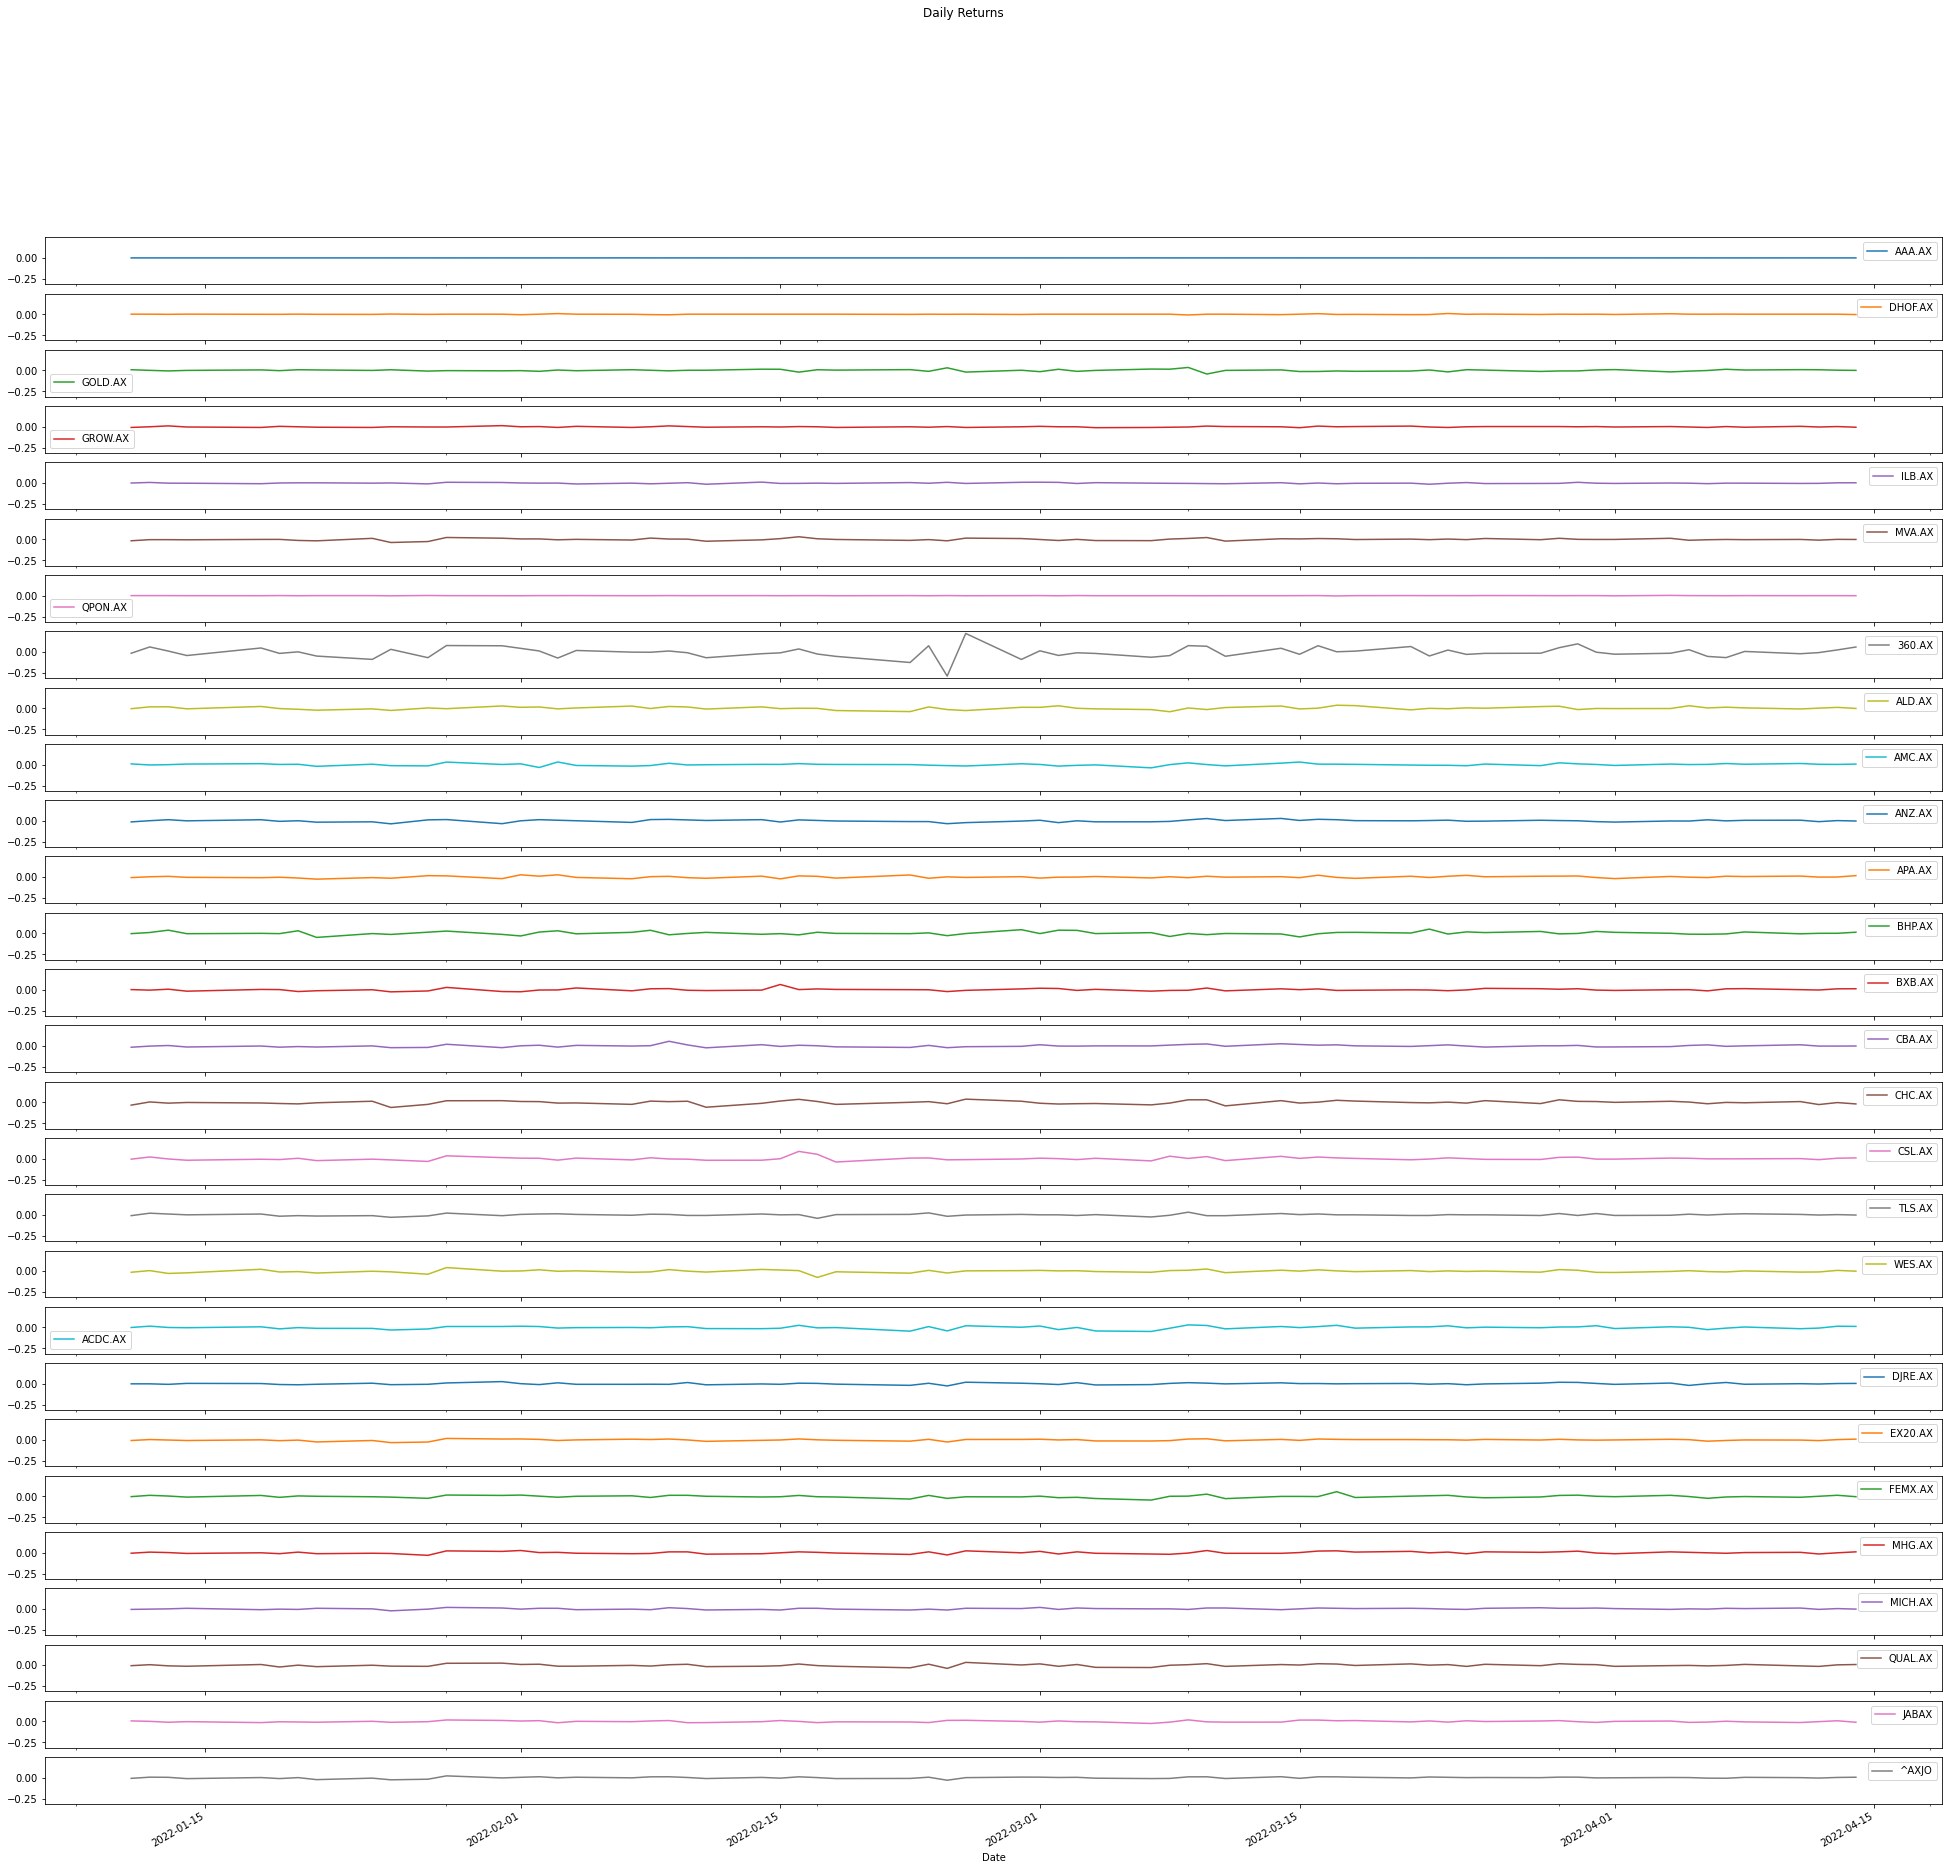

In [59]:
datareturns_df.plot(subplots=True,figsize=(34, 32), title="Daily Returns", sharey=True)

#graph individually,for loop graphing each column

In [60]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + datareturns_df).cumprod()

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

<Figure size 2520x1800 with 0 Axes>

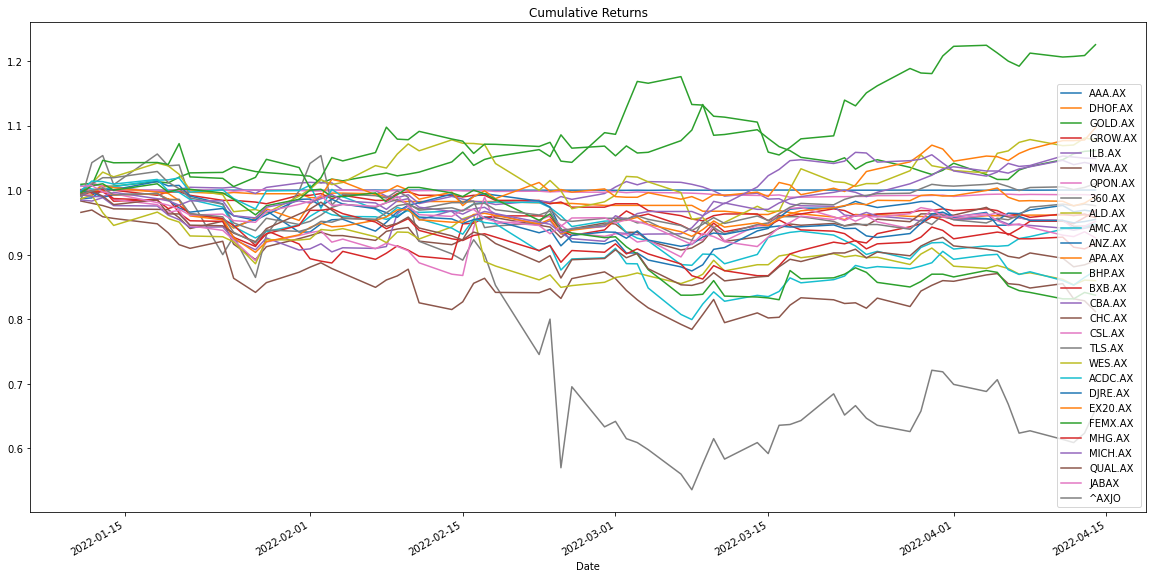

In [61]:
# Plot cumulative returns
from matplotlib.pyplot import figure

figure(figsize=(35, 25))
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

In [62]:
datareturns_df.head(10)

,AAA.AX,DHOF.AX,GOLD.AX,GROW.AX,ILB.AX,MVA.AX,QPON.AX,360.AX,ALD.AX,AMC.AX,...,WES.AX,ACDC.AX,DJRE.AX,EX20.AX,FEMX.AX,MHG.AX,MICH.AX,QUAL.AX,JABAX,^AXJO
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-11,0.0,0.000421,0.009048,-0.007895,0.000687,-0.016810,0.000387,-0.015834,-0.005665,0.007130,...,-0.013480,-0.000932,-0.001619,-0.006199,-0.004243,-0.007792,-0.006601,-0.006282,0.006028,-0.007654
2022-01-12,0.0,0.000241,0.001623,0.000000,0.007481,-0.003579,0.000387,0.059406,0.016421,-0.005310,...,0.006034,0.015026,-0.001621,0.005278,0.011364,0.005236,-0.003322,0.005385,0.001110,0.006603
2022-01-13,0.0,-0.001382,-0.005286,0.010610,-0.001212,-0.003591,0.000386,0.010514,0.017145,-0.001779,...,-0.027518,-0.000817,-0.007714,-0.000477,0.002809,0.000000,0.000000,-0.008384,-0.009754,0.004772
2022-01-14,0.0,0.000632,0.000943,-0.002625,-0.001821,-0.005206,-0.000386,-0.042775,-0.007131,0.005348,...,-0.020497,-0.003781,0.003682,-0.006208,-0.009804,-0.010417,0.006667,-0.013152,-0.002686,-0.010770
2022-01-18,0.0,-0.001033,0.006936,-0.007895,-0.007676,-0.000805,-0.000773,0.047101,0.020895,0.010047,...,0.021852,0.007179,0.002038,0.001922,0.009901,-0.002632,-0.009934,0.007615,-0.013917,0.002015
2022-01-19,0.0,-0.001405,-0.002041,0.005305,0.000996,-0.000403,0.000774,-0.017301,-0.004157,0.000585,...,-0.010330,-0.017312,-0.009764,-0.008153,-0.012605,-0.013193,-0.003344,-0.022201,-0.004097,-0.010299
2022-01-20,0.0,0.000663,0.008948,0.000000,0.003061,-0.012898,-0.001160,0.001174,-0.012524,0.002924,...,-0.005677,-0.002487,-0.012736,-0.001451,0.004255,0.005348,-0.006711,0.000000,-0.006400,0.001350
2022-01-21,0.0,-0.001296,0.006419,-0.005277,0.003051,-0.017558,0.000387,-0.049238,-0.023415,-0.021574,...,-0.022652,-0.011012,-0.006658,-0.023245,0.000000,-0.013298,0.006757,-0.018116,-0.009432,-0.022690


In [63]:
# Set weights
weights = [0.025, 0.18, 0.05, 0.02, 0.07, 0.085, 0.07, 0.0074, 0.0074, .0099, 0.033, 0.024, 0.101, 0.056, 0.134, 0.064, 0.104, 0.032, 0.088, 0.064, 0.04, 0.0736, 0.084, 0.098, 0.048, 0.098, 0.00, 0.00]

In [64]:
# Use the `dot` function to sum the product each weight and the corresponding stock daily return.
ascentbal_returns = datareturns_df.dot(weights)
# Rename `Close` Column to be specific to this portfolio.
ascentbal_returns.tail(30)

Date
2022-03-04   -0.012101
2022-03-07   -0.021999
2022-03-08   -0.003423
2022-03-09    0.010624
2022-03-10    0.019311
2022-03-11   -0.017458
2022-03-14    0.011679
2022-03-15   -0.003745
2022-03-16    0.013505
2022-03-17    0.014839
2022-03-18   -0.000681
2022-03-21    0.001981
2022-03-22    0.002191
2022-03-23    0.006173
2022-03-24   -0.003849
2022-03-25    0.002469
2022-03-28   -0.002018
2022-03-29    0.012362
2022-03-30    0.010715
2022-03-31    0.000841
2022-04-01   -0.009347
2022-04-04    0.003634
2022-04-05   -0.000866
2022-04-06   -0.009410
2022-04-07   -0.003025
2022-04-08    0.003540
2022-04-11   -0.000610
2022-04-12   -0.010090
2022-04-13    0.004824
2022-04-14    0.004027
dtype: float64

<AxesSubplot:title={'center':'Rolling Std Dev Ascent Balanced'}, xlabel='Date'>

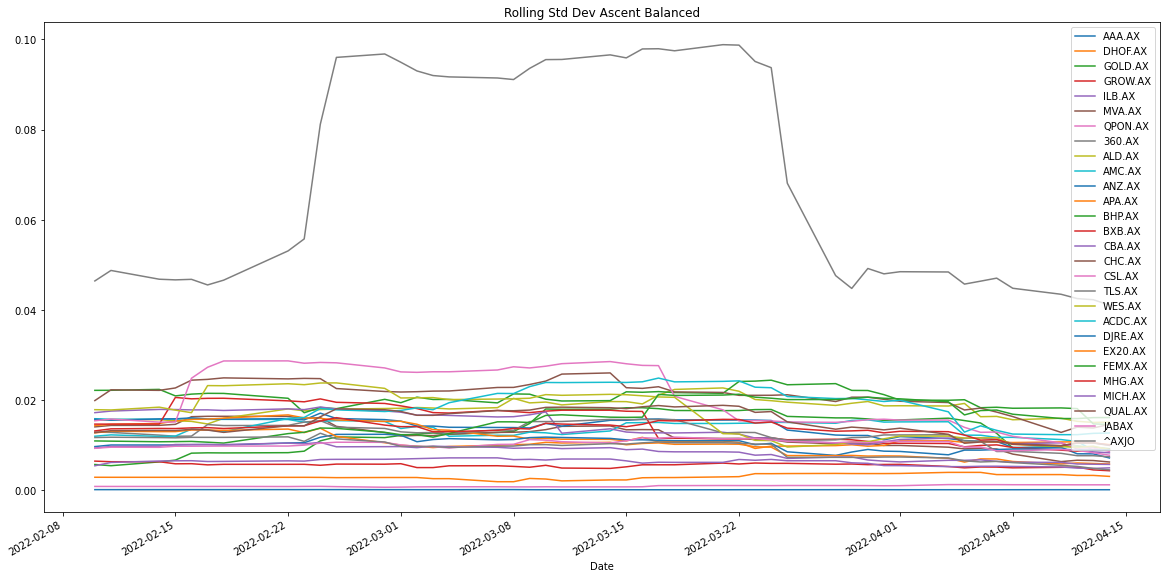

In [65]:
# Calculate rolling standard deviation
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rollingascentbal_std = datareturns_df.rolling(window=21).std()


# Plot the rolling standard deviation
rollingascentbal_std.plot(figsize=(20, 10), title="Rolling Std Dev Ascent Balanced")
# Plot rolling standard deviation